# Data-prep for CIFAR-10 Classification

In [1]:
import os
import pickle

import numpy as np

import matplotlib.pyplot as plt

In [2]:
path = "D:\Data\cifar-10-batches-py"

cifar_10_train_batches = os.listdir(path)
# ['batches.meta', 'data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'readme.html', 'test_batch']

cifar_10_train_batches = cifar_10_train_batches[1: -2]
# ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']

cifar_10_test_batch = 'test_batch'


# link = "http://www.cs.toronto.edu/~kriz/cifar.html"
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
train_batches = []
for batch in cifar_10_train_batches:
    train_batches.append(unpickle(os.path.join(path, batch)))

test_batch = unpickle(os.path.join(path, cifar_10_test_batch))

keys = list(train_batches[0].keys()) # [b'batch_label', b'labels', b'data', b'filenames']

# these are not strings but 'bytes' objects
images_key = keys[2]
labels_key = keys[1]

In [4]:
# the training data
train_images = [batch[images_key] for batch in train_batches] # list of numpy arrays
train_labels = [batch[labels_key] for batch in train_batches] # list of lists

# concatenate the training data into a numpy arrays 
train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)

print(train_images.shape, train_labels.shape)


# test data
test_images = test_batch[images_key] # is already a numpy array
test_labels = np.array(test_batch[labels_key])

print(test_images.shape, test_labels.shape)

(50000, 3072) (50000,)
(10000, 3072) (10000,)


In [5]:
# reshape into a (#, 32, 32, 3) image

train_samples_count = train_images.shape[0]
test_samples_count = test_images.shape[0]


# the training data
train_images_reshaped = train_images.reshape((train_samples_count, 3, 32, 32, 1))

train_images_reshaped = np.concatenate((train_images_reshaped[:, 0, :, :, :],
                                        train_images_reshaped[:, 1, :, :, :],
                                        train_images_reshaped[:, 2, :, :, :]),
                                       axis = 3)

print(train_images_reshaped.shape)


# the test data
test_images_reshaped = test_images.reshape((test_samples_count, 3, 32, 32, 1))

test_images_reshaped = np.concatenate((test_images_reshaped[:, 0, :, :, :],
                                       test_images_reshaped[:, 1, :, :, :],
                                       test_images_reshaped[:, 2, :, :, :]),
                                      axis = 3)

print(test_images_reshaped.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)


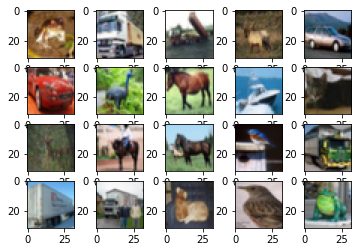

In [6]:
# visualizing

fig = plt.figure()

for i in range(20):
    y = fig.add_subplot(4, 5, i + 1)
    y.imshow(train_images_reshaped[i])
    
plt.show()

In [7]:
# create the validation data
validation_samples_count = int(0.1 * train_samples_count)


train_inputs = train_images_reshaped[:-validation_samples_count]
train_targets = train_labels[:-validation_samples_count]

validation_inputs = train_images_reshaped[-validation_samples_count:]
validation_targets = train_labels[-validation_samples_count:]

test_inputs = test_images_reshaped
test_targets = test_labels

print(validation_inputs.shape)

(5000, 32, 32, 3)


In [8]:
# save to the disk

np.savez('cifar_10_train_data', inputs=train_inputs, targets=train_targets)
np.savez('cifar_10_validation_data', inputs=validation_inputs, targets=validation_targets)
np.savez('cifar_10_test_data', inputs=test_inputs, targets=test_targets)